In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['indian_liver_patient.csv']


In [2]:
#Let's check the dataset
df = pd.read_csv('../input/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


> **Data Analysis**

In [3]:
#Let's checl the descriptive statistics
df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [4]:
#Let's check the data types

df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [5]:
#Let's check if any data has null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
#Let's check the shape of dataset
df.shape

(583, 11)

In [7]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].replace(np.nan, 0)

In [8]:
#Checking whether all columns are having the string data types
all(isinstance(column, str) for column in df.columns)

True

**Data Visualization**

In [9]:
#Importing Viuualization libraries using matlpotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

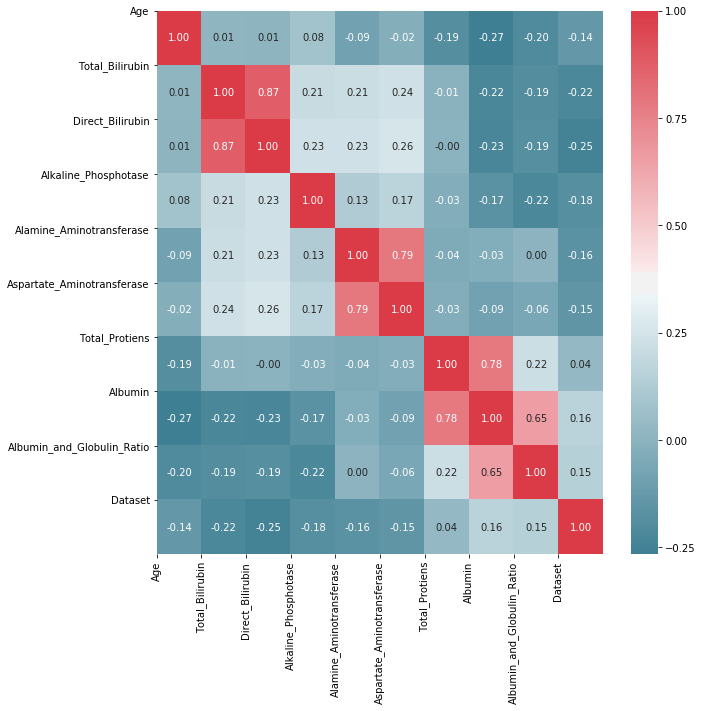

In [10]:
    #Creating correlation matrix
    df_corr = df.corr()
    #Plot figsize
    plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(df_corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(df_corr.columns)), df_corr.columns);
    #Apply yticks
    plt.yticks(range(len(df_corr.columns)), df_corr.columns)
    #show plot
    plt.show()

In [11]:
columns = df.columns
columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [12]:
features = list(map(str, df.columns))
features

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

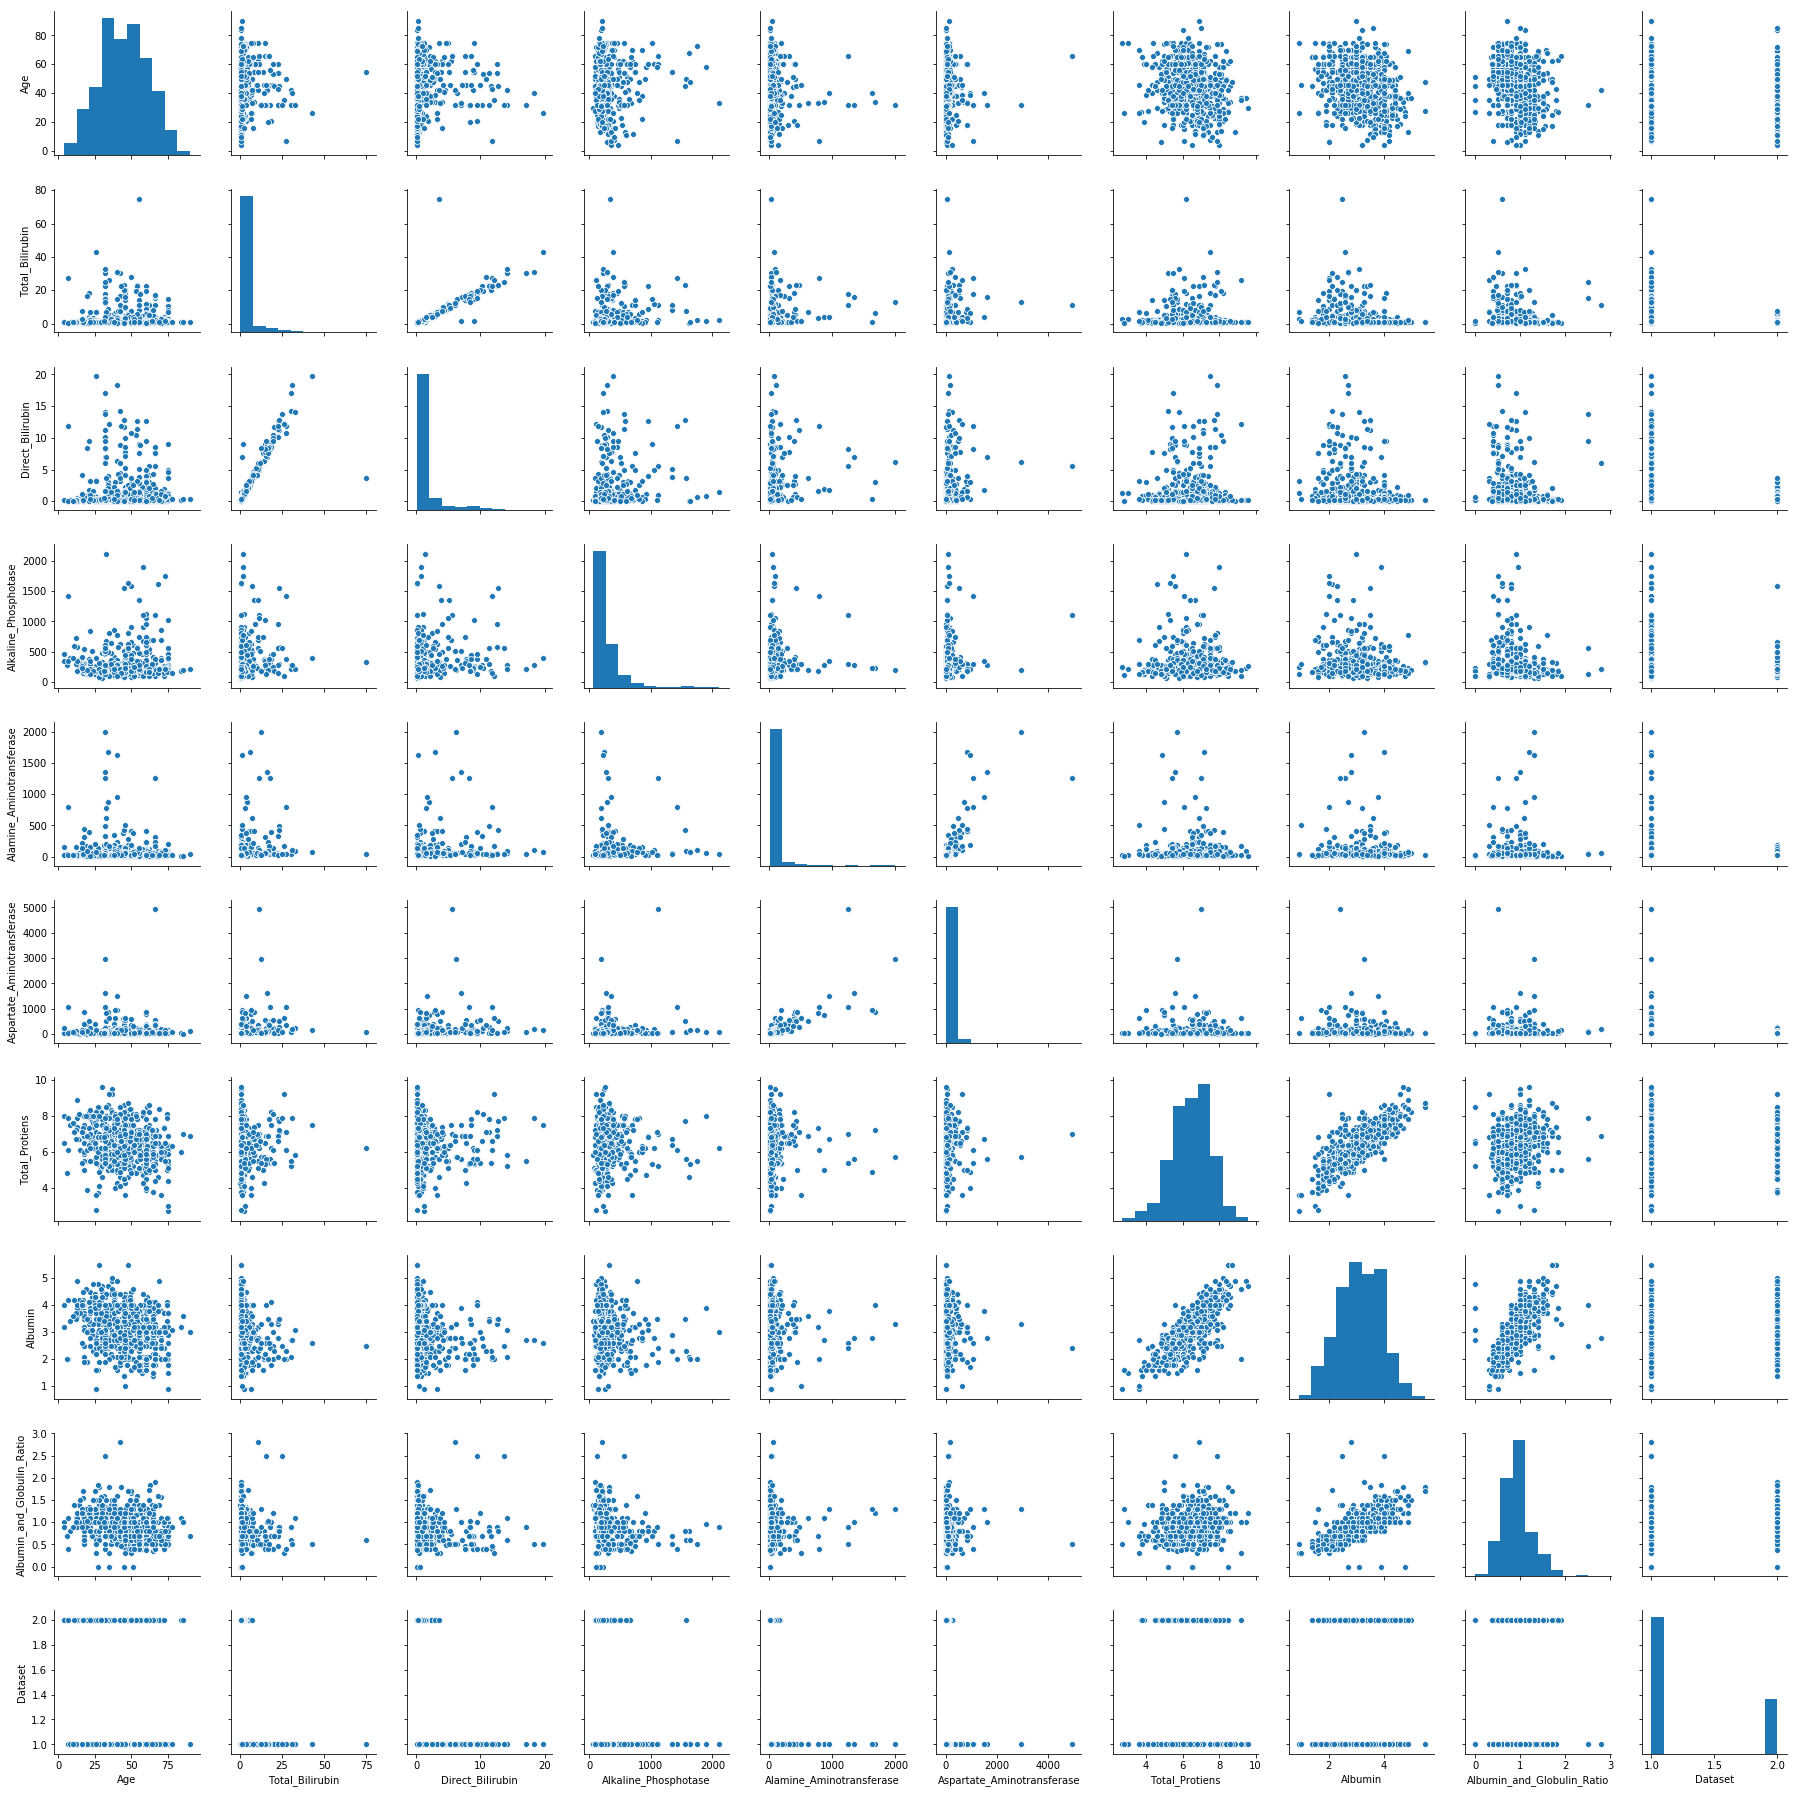

In [13]:
sns.pairplot(df.select_dtypes(include=[np.number]), dropna=True)

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


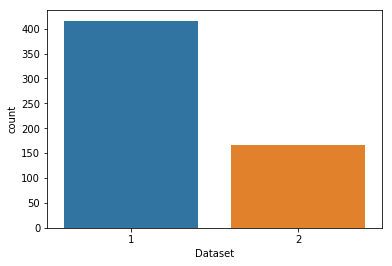

In [14]:
#Comparison of patients with and without liver diseases
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


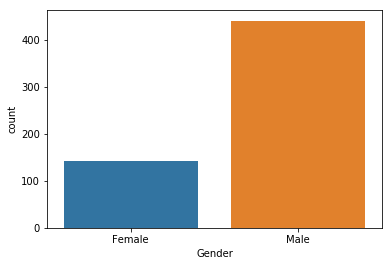

In [15]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


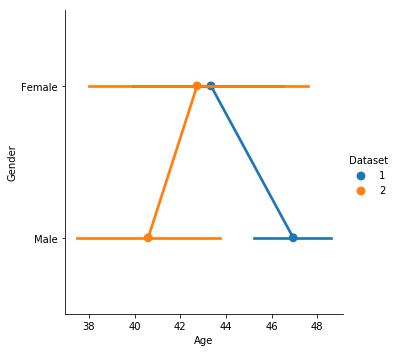

In [16]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df);

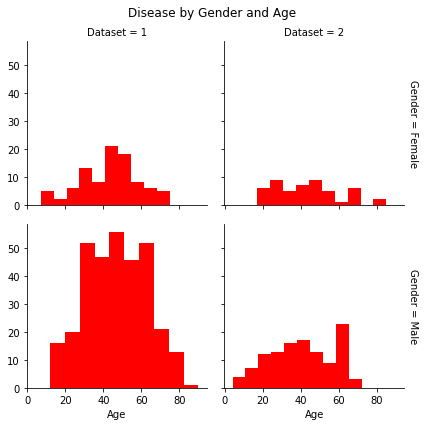

In [17]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

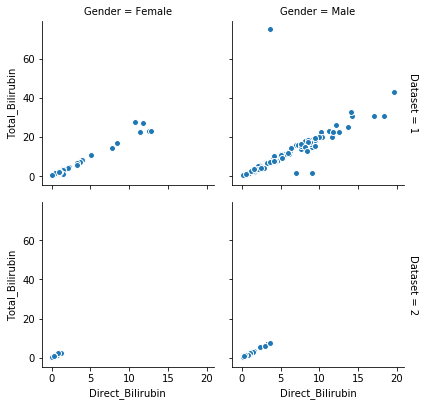

In [18]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

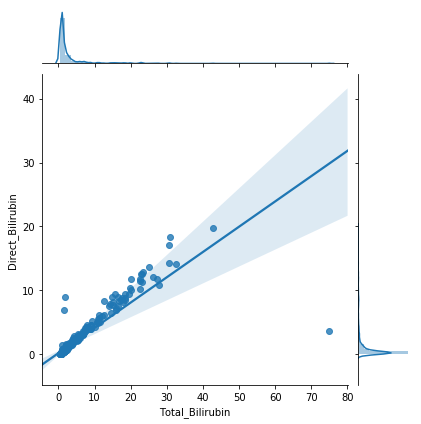

In [19]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

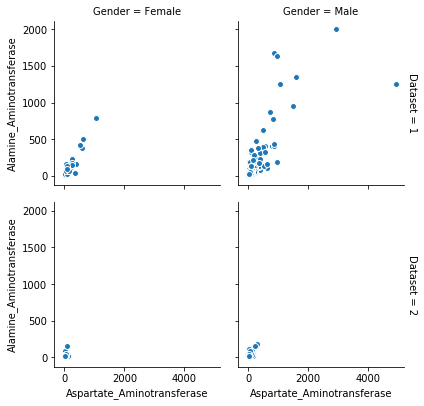

In [20]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

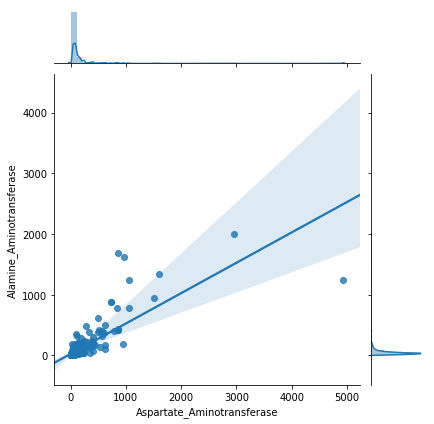

In [21]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

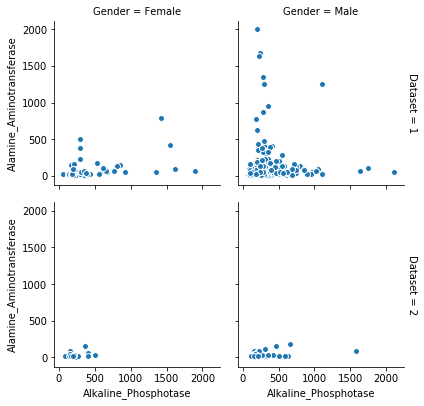

In [22]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

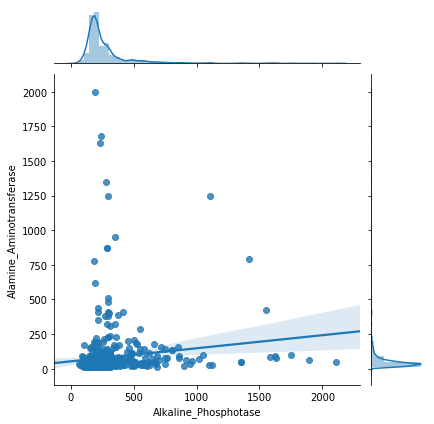

In [23]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=df, kind="reg")

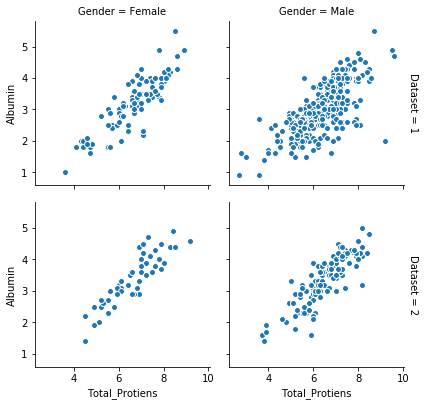

In [24]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

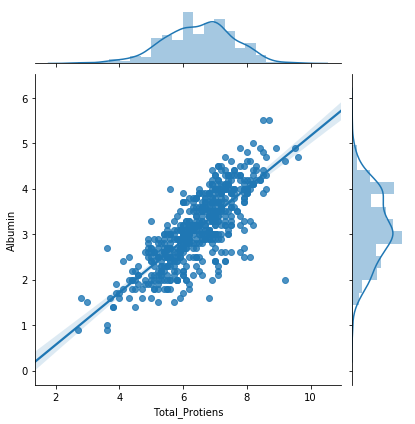

In [25]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

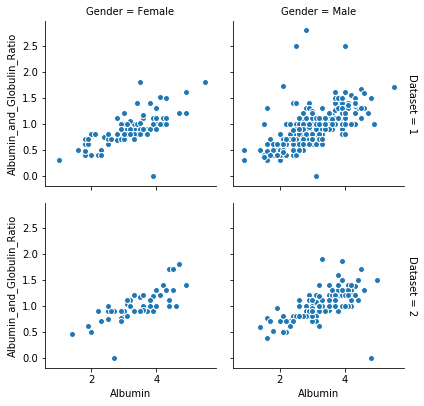

In [26]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

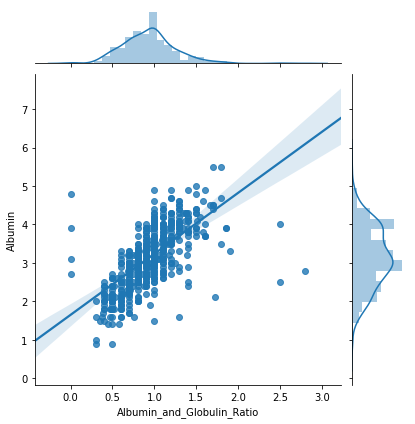

In [27]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

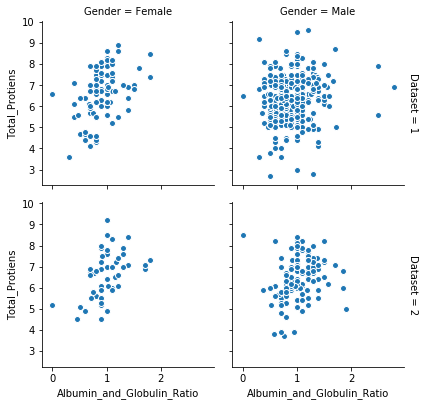

In [28]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

**Machine Leaening**

In [29]:
from sklearn.preprocessing import LabelEncoder

num = LabelEncoder()
df['Gender'] = num.fit_transform(df['Gender'].astype('str'))
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [30]:
features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
            'Albumin_and_Globulin_Ratio']
X= df[features]
y= df['Dataset']

In [31]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X,
y,
random_state=0)

In [32]:
>>> from sklearn.preprocessing import StandardScaler
>>> scaler = StandardScaler().fit(X_train)
>>> X_train = scaler.transform(X_train)
>>> X_test = scaler.transform(X_test)

In [33]:
>>> from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
>>> svc = SVC(kernel='rbf')
>>> svc.fit(X_train, y_train)
>>> y_pred1 = svc.predict(X_test)
svc1= svc.score(X_train, y_train)
svc2 = svc.score(X_test, y_test)
print(svc1, svc2)
print('Classification Report: \n', classification_report(y_test,y_pred1))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred1))
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc, X_train, y_train, cv=10))

0.7231121281464531 0.684931506849315
Classification Report: 
               precision    recall  f1-score   support

           1       0.68      1.00      0.81       100
           2       0.00      0.00      0.00        46

    accuracy                           0.68       146
   macro avg       0.34      0.50      0.41       146
weighted avg       0.47      0.68      0.56       146

Confusion Matrix: 
 [[100   0]
 [ 46   0]]
[0.71111111 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273
 0.72093023 0.72093023 0.72093023 0.72093023]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in vers

Logistic Regression Training Score: 
 0.7482837528604119
Logistic Regression Test Score: 
 0.7054794520547946
Coefficient: 
 [[-0.3310077  -0.00999103 -0.07530735 -0.87751434 -0.18649469 -2.05844495
  -1.45413515 -0.65421411  0.67075423 -0.11067867]]
Intercept: 
 [-1.95190054]
Accuracy: 
 0.7054794520547946
Confusion Matrix: 
 [[92  8]
 [35 11]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.92      0.81       100
           2       0.58      0.24      0.34        46

    accuracy                           0.71       146
   macro avg       0.65      0.58      0.57       146
weighted avg       0.68      0.71      0.66       146



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


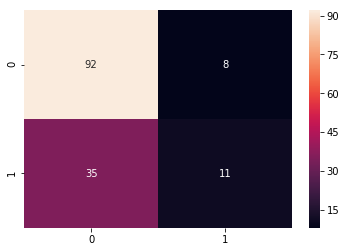

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

clf = LogisticRegression(C=100,penalty="l1").fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf1 = clf.score(X_train,y_train)
clf2 = clf.score(X_test,y_test)
print('Logistic Regression Training Score: \n', clf1)
print('Logistic Regression Test Score: \n', clf2)
print('Coefficient: \n', clf.coef_)
print('Intercept: \n', clf.intercept_)
print('Accuracy: \n', accuracy_score(y_test,clf_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test,clf_predict))
print('Classification Report: \n', classification_report(y_test,clf_predict))

sns.heatmap(confusion_matrix(y_test,clf_predict),annot=True,fmt="d")



In [35]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_train, y_train, cv=10))

[0.66666667 0.70454545 0.75       0.72727273 0.79545455 0.75
 0.74418605 0.69767442 0.76744186 0.69767442]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)
gnb_predict = gnb.predict(X_test)
gnb1= gnb.score(X_train,y_train)
gnb2= gnb.score(X_test,y_test)
print(gnb1,gnb2)
print('Confusion Matrix: \n', confusion_matrix(y_test,gnb_predict))
print('Classification Report: \n', classification_report(y_test,gnb_predict))
print(cross_val_score(gnb, X_train, y_train, cv=10))

0.528604118993135 0.589041095890411
Confusion Matrix: 
 [[40 60]
 [ 0 46]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.40      0.57       100
           2       0.43      1.00      0.61        46

    accuracy                           0.59       146
   macro avg       0.72      0.70      0.59       146
weighted avg       0.82      0.59      0.58       146

[0.48888889 0.56818182 0.45454545 0.63636364 0.54545455 0.54545455
 0.58139535 0.51162791 0.48837209 0.44186047]


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy: \n', accuracy_score(y_test,clf_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test,clf_predict))
print('Classification Report: \n', classification_report(y_test,clf_predict))
print(cross_val_score(clf, X_train, y_train, cv=10))


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.63
Accuracy: 
 0.6301369863013698
Confusion Matrix: 
 [[76 24]
 [30 16]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.76      0.74       100
           2       0.40      0.35      0.37        46

    accuracy                           0.63       146
   macro avg       0.56      0.55      0.55       146
weighted avg       0.62      0.63      0.62       146

[0.62222222 0.63636364 0.77272727 0.77272727 0.61363636 0.68181818
 0.62790698 0.58139535 0.76744186 0.60465116]


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest = random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = random_forest.score(X_train, y_train)
random_forest_score_test = random_forest.score(X_test, y_test)
print('Random Forest train Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
from sklearn.model_selection import cross_val_score
print(cross_val_score(random_forest, X_train, y_train, cv=10))

Random Forest train Score: 
 1.0
Random Forest Test Score: 
 0.678082191780822
Accuracy: 
 0.678082191780822
[[85 15]
 [32 14]]
              precision    recall  f1-score   support

           1       0.73      0.85      0.78       100
           2       0.48      0.30      0.37        46

    accuracy                           0.68       146
   macro avg       0.60      0.58      0.58       146
weighted avg       0.65      0.68      0.65       146

[0.71111111 0.72727273 0.75       0.68181818 0.77272727 0.70454545
 0.76744186 0.69767442 0.76744186 0.69767442]


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
clf_predict = clf.predict(X_test)
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy: \n', accuracy_score(y_test,clf_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test,clf_predict))
print('Classification Report: \n', classification_report(y_test,clf_predict))
print(cross_val_score(clf, X_train, y_train, cv=10))


Accuracy of Gradient Boosting classifier on training set: 0.94
Accuracy of Gradient Boosting classifier on test set: 0.68
Accuracy: 
 0.678082191780822
Confusion Matrix: 
 [[87 13]
 [34 12]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.87      0.79       100
           2       0.48      0.26      0.34        46

    accuracy                           0.68       146
   macro avg       0.60      0.57      0.56       146
weighted avg       0.64      0.68      0.65       146

[0.64444444 0.75       0.72727273 0.75       0.72727273 0.65909091
 0.69767442 0.62790698 0.76744186 0.6744186 ]
